In [9]:
import warnings
from PIL import Image
warnings.filterwarnings('ignore')
from modules import Img2TextModel
from utils import WordTokenizer, transform_factory, grid_visualization, get_attn_scores, attn_map_for_word

model_path = r"C:\Users\Yegyanathan V\Desktop\Python\Deep Learning\img2txt\checkpoints\img2text_tiny_256x256_16p.ckpt"
device = 'cuda'

model = Img2TextModel.from_pretrained(model_path)
# model = Img2TextModel({'num_layers': 1})
# model.to(device)
model.eval()
# load the saved tokenizer.
tokenizer = WordTokenizer.from_saved()

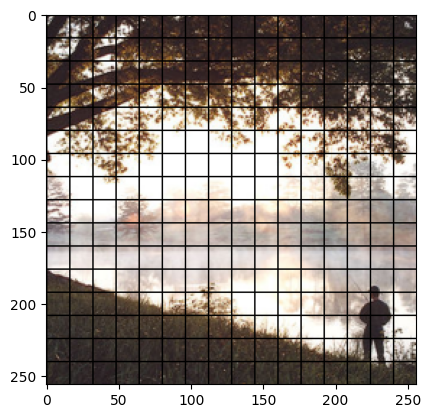

In [10]:
image_path = r"C:\Users\Yegyanathan V\Desktop\Python\Deep Learning\img2txt\data\Flicker8k_Dataset\17273391_55cfc7d3d4.jpg"
image = Image.open(image_path).convert('RGB')
grid_visualization(image)

In [12]:
# generate tokens using the generate method.
visual_prompt = transform_factory(mode='feed', patch_size=16)(image).unsqueeze(0)
print(visual_prompt.shape)
x, attn_scores = model.generate(visual_prompt, temperature=1, do_sample=False, top_k=None)
caption = tokenizer.ids_to_sentence(x)
print(caption)

torch.Size([1, 256, 768])
a man in a red shirt is standing in a red shirt and a picture .


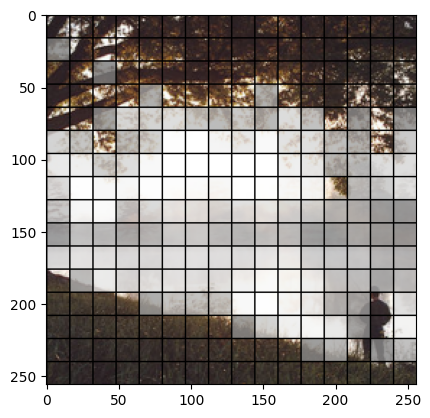

In [13]:
# specify the word and head number.
word_num = 6
head_num = 3

# retreive the required attn score map.
scores = get_attn_scores(attn_scores, word_num, head_num)
attn_map_for_word(image, scores)